In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
state_gun_provisions = pd.read_csv('Resources/gun_law_summary_v2.csv')

state_gun_provisions = state_gun_provisions.drop('Unnamed: 0', axis=1)

state_gun_provisions = state_gun_provisions.rename(columns = {'state':'State'})

state_gun_provisions = state_gun_provisions.drop('year', axis=1)

state_gun_provisions = state_gun_provisions.set_index('State')

In [4]:
state_gun_provisions.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
Alaska,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Arizona,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
California,0,1,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,100


In [5]:
heat_map_df = state_gun_provisions.copy()
heat_map_df = heat_map_df.sort_values('lawtotal', ascending=False)
heat_map_df = heat_map_df.drop(['lawtotal'], axis=1)

In [6]:
heat_map_df.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
State,,,,,,,,,,,,,,,,,,,,,
California,0,1,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Massachusetts,1,1,1,1,1,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
Connecticut,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,0
Hawaii,1,1,1,1,0,1,1,0,1,0,...,1,0,0,1,1,1,1,1,1,1
New York,0,0,1,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,0


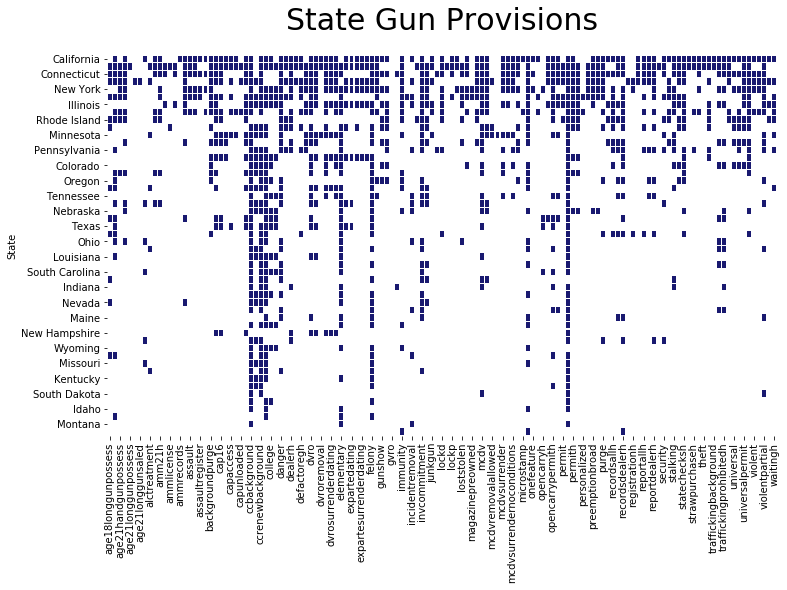

In [7]:
fig, ax = plt.subplots(figsize=(12,7))

title= 'State Gun Provisions'

plt.title(title,fontsize=30)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(heat_map_df,
            cmap=ListedColormap(['white', 'midnightblue']),
            cbar=False,
            linecolor='white',
            linewidths=0.05,
            ax=ax)

plt.show()

In [8]:
gun_deaths_df = pd.read_csv('Resources/Gun_Death_Events_By_ICD-10_113_Cause.txt', sep='\t')

In [9]:
gun_deaths_df.head()

,Year,State,ICD-10 113 Cause,Deaths
0,2013,Alabama,Accidental discharge of firearms (W32-W34),25
1,2013,Alabama,Intentional self-harm (suicide) by discharge o...,504
2,2013,Alabama,Assault (homicide) by discharge of firearms (*...,317
3,2013,Alabama,"#Legal intervention (Y35,Y89.0)",0
4,2013,Alaska,Accidental discharge of firearms (W32-W34),0


In [10]:
years_list = [2013,2014,2015,2016]

data_by_year_dict = dict()

for year in years_list: 
    data_by_year_dict[year]= gun_deaths_df.loc[gun_deaths_df['Year'] == year]
    data_by_year_dict[year] = data_by_year_dict[year].drop('Year', axis=1)
    data_by_year_dict[year] = pd.pivot_table(data_by_year_dict[year],
                   values = 'Deaths',
                   index='State',
                   columns = 'ICD-10 113 Cause')
    data_by_year_dict[year] = data_by_year_dict[year].rename(columns =  {
        '#Legal intervention (Y35,Y89.0)':'Legal Intervention',
        'Accidental discharge of firearms (W32-W34)':'Accidental',
        'Assault (homicide) by discharge of firearms (*U01.4,X93-X95)':'Homocide',
        'Intentional self-harm (suicide) by discharge of firearms (X72-X74)':'Suicide'}
                              )
    data_by_year_dict[year]['Total'] = data_by_year_dict[year].sum(axis=1)

In [11]:
data_by_year_dict[2016].head()

ICD-10 113 Cause,Legal Intervention,Accidental,Homocide,Suicide,Total
State,,,,,
Alabama,12,21,454,550,1037
Alaska,0,0,45,113,158
Arizona,13,0,303,755,1071
Arkansas,0,11,182,331,524
California,74,36,1467,1595,3172


In [12]:
census_data_df = pd.read_csv('Resources/us_census_sorted_data.csv')

census_data_df = census_data_df.drop('Unnamed: 0', axis=1)

census_data_df = census_data_df.rename(columns={
    'State Name':'State',
    'income per capita':'Income Per Capita',
    'unemployment_rate(%)':'Unemployment Rate',
    'poverty_rate(%)':'Poverty Rate',
    'no_college_education_rate(%)':'No College Education Rate'
})
census_data_df = census_data_df.set_index('State')

In [13]:
census_data_df.head()

,Population,Income Per Capita,Unemployment Rate,Poverty Rate,No College Education Rate
State,,,,,
Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957
Alaska,728300.0,33129.0,4.407112,9.867637,14.591377
Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233
Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322
California,38066920.0,29906.0,5.476051,16.064457,13.719686


In [14]:
law_census_df = census_data_df.join(state_gun_provisions)

In [15]:
law_census_df.head()

,Population,Income Per Capita,Unemployment Rate,Poverty Rate,No College Education Rate,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
Alaska,728300.0,33129.0,4.407112,9.867637,14.591377,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
California,38066920.0,29906.0,5.476051,16.064457,13.719686,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,100


In [16]:
provisions_list = list(state_gun_provisions.columns)

provisions_load_df = pd.DataFrame('', index=provisions_list, columns=['In Population', 'Out Population'])

provisions_load_df = provisions_load_df.drop('lawtotal')

In [17]:
population_size_df = law_census_df.copy()

population_size_df = population_size_df.drop(['Income Per Capita',
                                              'Unemployment Rate',
                                              'Poverty Rate',
                                              'No College Education Rate',
                                              'lawtotal'], axis=1)

population_size_df['Population'] = population_size_df['Population'].astype(int)

law_list = population_size_df.columns

law_list = law_list[1:]

for law in law_list:
    population_size_df[law] = population_size_df[law]* population_size_df['Population']
    
population_size_df = population_size_df.drop('Population', axis=1)

In [18]:
population_size_df.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,4817678,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska,0,728300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,6561516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
California,0,38066920,0,38066920,0,0,0,38066920,0,38066920,...,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920


In [19]:
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'Total States'] = law_census_df[i].sum()
    
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'In Population'] = population_size_df[i].sum()
    
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'Out Population'] = census_data_df['Population'].sum() - population_size_df[i].sum()
    
provisions_load_df["Population Check"] = provisions_load_df["In Population"] + provisions_load_df["Out Population"]

provisions_load_df["% of US Population Impacted"] = (provisions_load_df["In Population"] / provisions_load_df["Population Check"])*100

provisions_load_df = provisions_load_df.sort_values('% of US Population Impacted')

In [20]:
provisions_load_df['% of States'] = (provisions_load_df['Total States'] / 50)*100

In [21]:
provisions_load_df

,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
gvro,0,313473348,0.0,313473348,0.000000,0.0
registration,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsale,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsaled,1392704,312080644,1.0,313473348,0.444281,2.0
mcdvremovalrequired,5383661,308089687,1.0,313473348,1.717422,2.0
residential,6657291,306816057,1.0,313473348,2.123718,2.0
age21longgunpossess,6657291,306816057,1.0,313473348,2.123718,2.0
locked,6657291,306816057,1.0,313473348,2.123718,2.0
inspection,7710543,305762805,2.0,313473348,2.459712,4.0
incidentall,8874374,304598974,1.0,313473348,2.830982,2.0


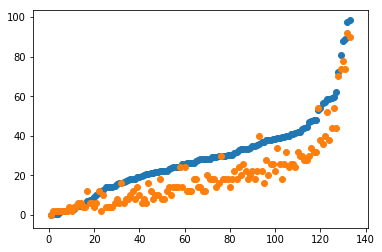

In [22]:
x_axis= list(np.linspace(1,133,133))

plt.scatter(x_axis,provisions_load_df['% of US Population Impacted'])
plt.scatter(x_axis,provisions_load_df['% of States'])

In [23]:
gun_deaths_state = data_by_year_dict[2016]
gun_deaths_state = gun_deaths_state.reset_index()
gun_deaths_state.head()

ICD-10 113 Cause,State,Legal Intervention,Accidental,Homocide,Suicide,Total
0,Alabama,12,21,454,550,1037
1,Alaska,0,0,45,113,158
2,Arizona,13,0,303,755,1071
3,Arkansas,0,11,182,331,524
4,California,74,36,1467,1595,3172


In [24]:
population_size_df = population_size_df.reset_index()
population_size_df.head()

,State,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
0,Alabama,0,0,0,0,0,0,0,4817678,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,728300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,6561516,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,California,0,38066920,0,38066920,0,0,0,38066920,0,...,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920


In [25]:
combined_state_incident = pd.merge(gun_deaths_state, population_size_df, on='State')
combined_state_incident.head()

,State,Legal Intervention,Accidental,Homocide,Suicide,Total,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
0,Alabama,12,21,454,550,1037,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,0,45,113,158,0,728300,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,13,0,303,755,1071,6561516,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,0,11,182,331,524,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,California,74,36,1467,1595,3172,0,38066920,0,38066920,...,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920


In [26]:
from scipy import stats
x = list(combined_state_incident["age18longgunpossess"])
y = list(combined_state_incident["Accidental"])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [27]:
print("slope: {}".format(slope))
print("p-value: {}".format(p_value))
print("r-value: {}".format(r_value))

slope: -2.735170635023288e-07
p-value: 0.5367959326276411
r-value: -0.08943788079203302


In [42]:
regression_headers = ["Provision", "Slope", "Y-Int", "r-value", "p-value", "std-err"]

regression_accidents = pd.DataFrame(columns=regression_headers)

for law in law_list:
    x = combined_state_incident["Accidental"]
    y = combined_state_incident[law]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    accidents_data = {
        "Provision": law,
        "Slope": slope,
        "Y-Int": intercept,
        "r-value": r_value,
        "p-value": p_value,
        "std-err": std_err
    }
    
    regression_accidents = regression_accidents.append(accidents_data,ignore_index= True)

regression_accidents.sort_values(by='r-value', ascending=False).head()

,Provision,Slope,Y-Int,r-value,p-value,std-err
91,permitconcealed,423160.677516,2.976713e+06,0.659208,1.935215e-07,69671.853056
28,ccbackground,418926.933011,3.076636e+06,0.653058,2.742711e-07,70119.466855
31,ccrevoke,404083.371150,2.588935e+06,0.609157,2.673403e-06,75931.425753
30,ccrenewbackground,385777.376309,2.674872e+06,0.607830,2.848754e-06,72743.038522
32,college,399062.987333,5.866319e+05,0.583282,8.775558e-06,80212.490090


In [29]:
provisions_load_df.sort_values(by='% of US Population Impacted', ascending=False).head(10)

,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
ccbackground,308415834,5057514,45.0,313473348,98.386621,90.0
permitconcealed,304981923,8491425,46.0,313473348,97.291181,92.0
ccrevoke,278553528,34919820,37.0,313473348,88.860354,74.0
ccrenewbackground,276095438,37377910,39.0,313473348,88.076208,78.0
felony,253150233,60323115,37.0,313473348,80.756541,74.0
elementary,226418715,87054633,35.0,313473348,72.229016,70.0
dvro,194894556,118578792,22.0,313473348,62.172608,44.0
invcommitment,186393738,127079610,27.0,313473348,59.460793,54.0
mcdv,185961044,127512304,22.0,313473348,59.322761,44.0
opencarrypermith,183835625,129637723,19.0,313473348,58.644738,38.0


In [30]:
# Seperate states with provisions and those without
age18longgunpossess_false = combined_state_incident.loc[combined_state_incident["age18longgunpossess"]==0]
age18longgunpossess_false = age18longgunpossess_false[['State','Accidental']]
age18longgunpossess_false

,State,Accidental
0,Alabama,21
1,Alaska,0
3,Arkansas,11
4,California,36
5,Colorado,11
7,Delaware,0
9,Georgia,21
11,Idaho,0
12,Illinois,11
13,Indiana,20


In [46]:
provisions_load_df.head()

,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
gvro,0,313473348,0.0,313473348,0.000000,0.0
registration,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsale,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsaled,1392704,312080644,1.0,313473348,0.444281,2.0
mcdvremovalrequired,5383661,308089687,1.0,313473348,1.717422,2.0


In [ ]:
# Looking for states with the provisisions, and how many deaths per state-
# Find sum of deaths from accidents in each state
# Bring in census information for each state
# Create columns yes and no for has provision
# Calculate death rate for each state

In [51]:
census_data_df = census_data_df.reset_index()
census_data_df.head()

,State,Population,Income Per Capita,Unemployment Rate,Poverty Rate,No College Education Rate
0,Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957
1,Alaska,728300.0,33129.0,4.407112,9.867637,14.591377
2,Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233
3,Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322
4,California,38066920.0,29906.0,5.476051,16.064457,13.719686


In [53]:
state_gun_provisions = pd.read_csv('Resources/gun_law_summary_v2.csv')
del state_gun_provisions['Unnamed: 0']
state_gun_provisions = state_gun_provisions.rename(columns={'state':'State'})
state_gun_provisions.head()

,State,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,2014,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
1,Alaska,2014,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,Arizona,2014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,Arkansas,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,California,2014,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,100


In [73]:
census_gunlaw = pd.merge(census_data_df, state_gun_provisions, on="State")
census_gunlaw2 = pd.merge(gun_deaths_state, census_gunlaw, on="State")
del census_gunlaw2['gvro']
census_gunlaw2.head()

,State,Legal Intervention,Accidental,Homocide,Suicide,Total,Population,Income Per Capita,Unemployment Rate,Poverty Rate,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,12,21,454,550,1037,4817678.0,23936.0,4.747432,18.467610,...,0,0,0,0,0,0,0,0,0,10
1,Alaska,0,0,45,113,158,728300.0,33129.0,4.407112,9.867637,...,0,0,0,0,0,0,0,0,0,4
2,Arizona,13,0,303,755,1071,6561516.0,25537.0,4.634097,17.820714,...,0,0,0,0,0,0,0,0,0,11
3,Arkansas,0,11,182,331,524,2947036.0,22595.0,3.905280,18.639168,...,0,0,0,0,0,0,0,0,0,11
4,California,74,36,1467,1595,3172,38066920.0,29906.0,5.476051,16.064457,...,1,1,1,1,1,1,1,1,1,100


In [118]:
def Accidents(pd_df, law):
    scale = 1000000
    df = pd.DataFrame(pd_df.groupby(law).sum())
    data = {
        "Law" : law,
        "False" : list(df['Accidental'])[0],
        "True": list(df['Accidental'])[1],
        "False Rate" : (list(df['Accidental'])[0]) / (list(df['Population'])[0]) * scale,
        "True Rate" : (list(df['Accidental'])[1]) / (list(df['Population'])[1]) * scale,
        "Scale" : scale
    }
    return data

In [119]:
pd.DataFrame(census_gunlaw2.groupby('age18longgunpossess').sum())

,Legal Intervention,Accidental,Homocide,Suicide,Total,Population,Income Per Capita,Unemployment Rate,Poverty Rate,No College Education Rate,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
age18longgunpossess,,,,,,,,,,,,,,,,,,,,,
0,339,342,11322,17470,29473,236887092.0,1046328.0,154.844403,559.803488,657.835995,...,4,6,5,10,3,3,12,2,5,817
1,57,27,2974,5463,8521,76586256.0,360126.0,56.542741,165.110524,208.162302,...,3,3,6,7,2,2,4,2,4,508


In [120]:
new_laws = list(census_gunlaw2.columns)[12:]

In [121]:
accident_df = pd.DataFrame(columns=["Law","False","True", "False Rate", "True Rate", "Scale"])

for law in new_laws:
    accident_df = accident_df.append(Accidents(census_gunlaw2, law), ignore_index=True)
    
accident_df.head(50)

,Law,False,True,False Rate,True Rate,Scale
0,age18longgunpossess,342,27,1.443726,0.352544,1000000
1,age18longgunsale,218,151,1.507797,0.894065,1000000
2,age21handgunpossess,369,0,1.401212,0.000000,1000000
3,age21handgunsale,321,48,1.535227,0.459842,1000000
4,age21longgunpossess,369,0,1.202675,0.000000,1000000
5,age21longgunsale,369,0,1.182387,0.000000,1000000
6,age21longgunsaled,369,0,1.182387,0.000000,1000000
7,alcoholism,265,104,1.075403,1.550984,1000000
8,alctreatment,369,0,1.269231,0.000000,1000000
9,amm18,333,36,1.314729,0.598113,1000000


In [122]:
accident_df.sort_values(by='False Rate', ascending=False)

,Law,False,True,False Rate,True Rate,Scale
61,invcommitment,242,127,1.904318,0.681353,1000000
82,nosyg,275,94,1.872092,0.564297,1000000
34,danger,242,127,1.863815,0.691600,1000000
52,felony,104,265,1.724049,1.046809,1000000
57,immunity,322,47,1.674800,0.387752,1000000
74,mcdvdating,322,47,1.659919,0.393345,1000000
129,violentpartial,306,63,1.620271,0.505553,1000000
40,dvro,192,177,1.619177,0.908183,1000000
15,ammrestrict,309,60,1.596910,0.500106,1000000
111,stalking,275,94,1.572811,0.678078,1000000


census_gunlaw2

In [127]:
provisions_load2 = provisions_load_df.reset_index().rename(columns={'index':'Law'})
accident_weighed = pd.merge(accident_df, provisions_load2, on='Law', how='left')
accident_weighed.head()

,Law,False,True,False Rate,True Rate,Scale,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
0,age18longgunpossess,342,27,1.443726,0.352544,1000000,76586256.0,236887092.0,12.0,313473348.0,24.431505,24.0
1,age18longgunsale,218,151,1.507797,0.894065,1000000,168891560.0,144581788.0,19.0,313473348.0,53.877486,38.0
2,age21handgunpossess,369,0,1.401212,0.000000,1000000,50129896.0,263343452.0,8.0,313473348.0,15.991757,16.0
3,age21handgunsale,321,48,1.535227,0.459842,1000000,104383754.0,209089594.0,13.0,313473348.0,33.299084,26.0
4,age21longgunpossess,369,0,1.202675,0.000000,1000000,6657291.0,306816057.0,1.0,313473348.0,2.123718,2.0


In [129]:
accidental_weighed_3rd = accident_weighed.loc[accident_weighed['% of US Population Impacted']>=33.3]
accidental_weighed_3rd = accidental_weighed_3rd.sort_values('False Rate', ascending=False)
accidental_weighed_3rd.head()

,Law,False,True,False Rate,True Rate,Scale,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
61,invcommitment,242,127,1.904318,0.681353,1000000,186393738.0,127079610.0,27.0,313473348.0,59.460793,54.0
82,nosyg,275,94,1.872092,0.564297,1000000,166578880.0,146894468.0,27.0,313473348.0,53.139727,54.0
34,danger,242,127,1.863815,0.691600,1000000,183632154.0,129841194.0,26.0,313473348.0,58.579830,52.0
52,felony,104,265,1.724049,1.046809,1000000,253150233.0,60323115.0,37.0,313473348.0,80.756541,74.0
57,immunity,322,47,1.674800,0.387752,1000000,121211570.0,192261778.0,17.0,313473348.0,38.667265,34.0


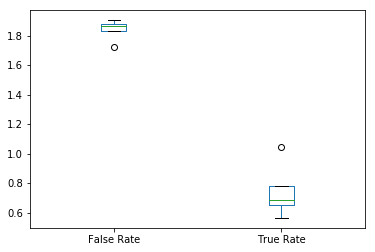

In [133]:
top4 = accidental_weighed_3rd.head(4)
top4 = top4[['False Rate', 'True Rate']]
top4.plot(kind='box')
plt.savefig('Resources/top4_boxplot.png')
plt.show()

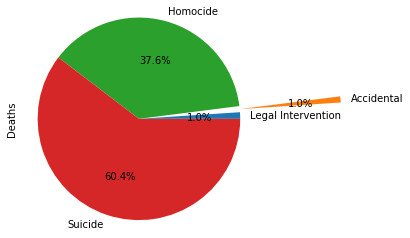

In [169]:
pie_me = pd.DataFrame(census_gunlaw2.sum()[['Legal Intervention', 'Accidental', 'Homocide', 'Suicide']]).rename(columns={0:'Deaths'})
explode = (0, 1, 0, 0)
pie_me.plot(kind='pie', y='Deaths', explode=explode, autopct="%1.1f%%", legend=False)
plt.axis("equal")
plt.savefig('Resources/DeathbyPie.png')
plt.show()
